# Chapter: Data Preprocessing

# Topic: Implementing MLR on simulated process data

In [5]:
# read data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np; import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive/')

%cd "/content/drive/My drive/hanhwa_AA/"

!git clone https://github.com/SungKu/Hanhwa_AA.git

linkpath = "/content/drive/My Drive/hanhwa_AA/"
dirname = os.getcwd()

data_pth = os.path.join(linkpath,'VSdata.csv')
data_pth2 = os.path.join(linkpath,'VSdata_val.csv')

VSdata = pd.read_csv(data_pth).values
VSdata_val = pd.read_csv(data_pth2).values

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My drive/hanhwa_AA/'
/content
fatal: destination path 'Hanhwa_AA' already exists and is not an empty directory.


In [6]:
# separate X and y
y_train = VSdata[:,0]
X_train = VSdata[:,1:]

y_val = VSdata_val[:,0]
X_val = VSdata_val[:,1:]

In [8]:
##  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           MLR using all variables
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.613536136516567


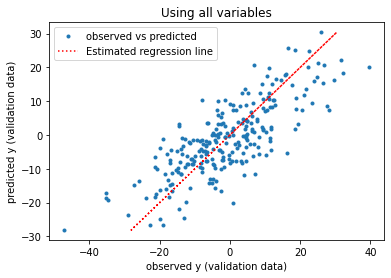

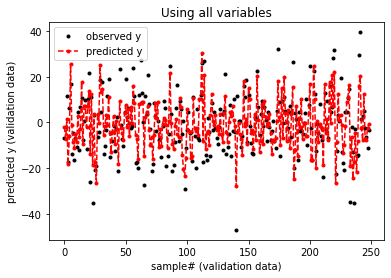

(<matplotlib.legend.Legend at 0x7fbdb70b8c10>, None)

In [17]:
# scale X
scaler_all = StandardScaler()
X_train_scaled = scaler_all.fit_transform(X_train)
X_val_scaled = scaler_all.transform(X_val)

# fit
MLR_all = LinearRegression().fit(X_train_scaled, y_train)

# predict
y_val_pred = MLR_all.predict(X_val_scaled)

# score
R2_all_train = MLR_all.score(X_train_scaled, y_train)
R2_all = MLR_all.score(X_val_scaled, y_val)
print(R2_all)

# plot raw vs predicted target
plt.figure()
plt.plot(y_val, y_val_pred, '.', label='observed vs predicted')
plt.plot(y_val_pred, y_val_pred, 'r:', label='Estimated regression line')
plt.title('Using all variables'), plt.legend()
plt.xlabel('observed y (validation data)')
plt.ylabel('predicted y (validation data)')
plt.show()


In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           MLR using only 10 relevant variables
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.6331304603532127


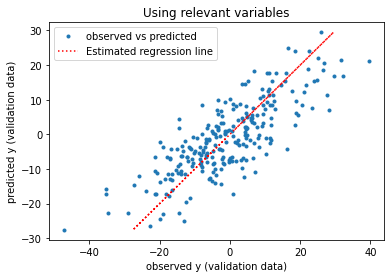

In [19]:
# select only relevant inputs
k = 10
X_train_rel = X_train[:,16:16+k]
X_val_rel = X_val[:,16:16+k]

# scale X
scaler_rel = StandardScaler()
X_train_rel_scaled = scaler_rel.fit_transform(X_train_rel)
X_val_rel_scaled = scaler_rel.transform(X_val_rel)

# fit
MLR_rel = LinearRegression().fit(X_train_rel_scaled, y_train)

# predict
y_val_rel_pred = MLR_rel.predict(X_val_rel_scaled)

# score
R2_rel_train = MLR_rel.score(X_train_rel_scaled, y_train)
R2_rel = MLR_rel.score(X_val_rel_scaled, y_val)
print(R2_rel)

# plot raw vs predicted target
plt.figure()
plt.plot(y_val, y_val_rel_pred, '.', label='observed vs predicted')
plt.plot(y_val_rel_pred, y_val_rel_pred, 'r:', label='Estimated regression line')
plt.title('Using relevant variables'), plt.legend()
plt.xlabel('observed y (validation data)')
plt.ylabel('predicted y (validation data)')
plt.show()